In [2]:
# import modules -- lots of documentation online for all of them! 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, WhiteKernel, ConstantKernel as C

In [3]:
# toy function (we will assume this is a black box) -- this is where real data would be imported
np.random.seed(10)
def func_1D(x):
	num_pts = x.shape[0]
	arr = np.zeros((2,num_pts))
	arr[0,:] = x**2.0
	arr[1,:] = np.ones(num_pts)*5
	y  = 20*np.sin(x) + np.random.normal(0,2,num_pts) + np.ones(num_pts)*5 + 3*x + np.amax(arr, axis=0)
	return y 

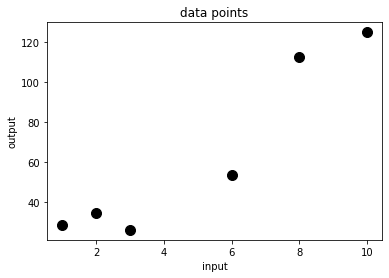

In [8]:
# sample the function (w/ real data this would just be import data)
X = np.asarray([1, 2, 3, 6, 8, 10])
y = func_1D(X)

# plot the data
plt.figure()
plt.plot(X,y,'k.',markersize=20)
plt.xlabel('input')
plt.ylabel('output')
plt.title('data points')
plt.savefig('data points')

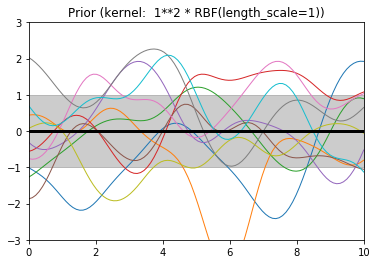

In [9]:
# define a prior i.e. a distribution of functions
# what this really means: choose a kernel and kernel hyperparameters

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
#kernel = 1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1)
gp = GaussianProcessRegressor(kernel=kernel,alpha=5.0)

# plot the prior
plt.figure()
X_ = np.linspace(0, 10, 100) 
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')
y_samples = gp.sample_y(X_[:, np.newaxis], 10) #these are just randomly chosen EXAMPLES to plot
plt.plot(X_, y_samples, lw=1)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)
plt.savefig('prior_1')


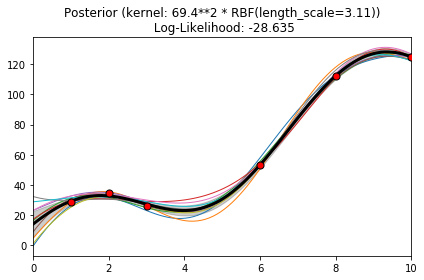

In [10]:
# train the model: prior --> posterior 
X = X[:, np.newaxis]
gp.fit(X, y)

# plot the posterior
plt.figure()
X_ = np.linspace(0, 10, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
				 alpha=0.2, color='k')

y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.xlim(0, 10)
#plt.ylim(-3, 3)
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
		  % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
		  fontsize=12)
plt.tight_layout()
plt.savefig('posterior_1')

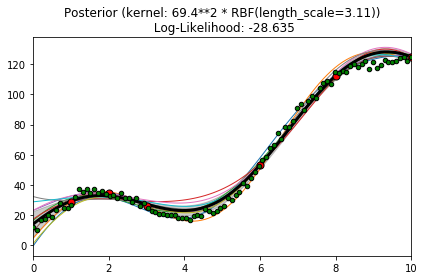

In [11]:
# see how the model performs on "unseen" data
# sample the black box more 
x_correct = np.linspace(0,10,100)
y_correct = func_1D(x_correct) 

plt.figure()
X_ = np.linspace(0, 10, 100)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
				 alpha=0.2, color='k')

y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.scatter(x_correct, y_correct, c='g', s=20, zorder=20, edgecolors=(0, 0, 0))
plt.xlim(0, 10)
#plt.ylim(-3, 3)
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
		  % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
		  fontsize=12)
plt.tight_layout()
plt.savefig('compare_to_real')